In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture

/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture


In [ ]:
import pickle

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, MaxPooling3D
from tensorflow.keras.layers import Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Conv3D(128, 3, input_shape=(28, 100, 100, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((2,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((2,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((2,2,2)))

# model.add(TimeDistributed(Flatten()))
model.add(Reshape((75, 2*12*12)))

model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add((Flatten()))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 22, 100, 100, 12   3584      
                             8)                                  
                                                                 
 activation (Activation)     (None, 22, 100, 100, 12   0         
                             8)                                  
                                                                 
 max_pooling3d (MaxPooling3  (None, 11, 50, 50, 128)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 11, 50, 50, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 11, 50, 50, 256)   0         
                                                        

In [ ]:
import time
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size = 8)
t2 = time.time()
print(f"Training time : {t2 - t1} sec")

Epoch 1/30
14/14 [==============================] - 32s 935ms/step - loss: 1.4145 - accuracy: 0.3364 - val_loss: 1.1179 - val_accuracy: 0.3571
Epoch 2/30
14/14 [==============================] - 6s 447ms/step - loss: 1.1449 - accuracy: 0.3271 - val_loss: 1.0646 - val_accuracy: 0.3571
Epoch 3/30
14/14 [==============================] - 6s 446ms/step - loss: 1.1088 - accuracy: 0.3832 - val_loss: 1.0823 - val_accuracy: 0.3571
Epoch 4/30
14/14 [==============================] - 6s 446ms/step - loss: 1.2044 - accuracy: 0.3551 - val_loss: 1.0448 - val_accuracy: 0.5714
Epoch 5/30
14/14 [==============================] - 6s 450ms/step - loss: 1.0825 - accuracy: 0.4019 - val_loss: 1.0044 - val_accuracy: 0.5714
Epoch 6/30
14/14 [==============================] - 7s 475ms/step - loss: 1.0702 - accuracy: 0.4112 - val_loss: 0.9951 - val_accuracy: 0.5000
Epoch 7/30
14/14 [==============================] - 6s 453ms/step - loss: 1.0247 - accuracy: 0.4579 - val_loss: 0.9511 - val_accuracy: 0.6429
Epoch

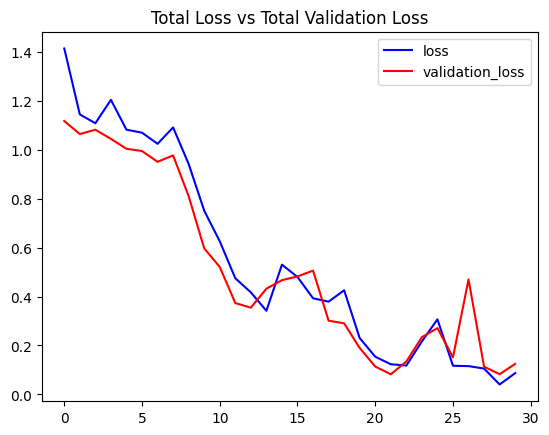

In [ ]:
import matplotlib.pyplot as plt
# Visualizing the training and validation loss
plt.plot(history.history['loss'], 'blue', label = 'loss')
plt.plot(history.history['val_loss'], 'red', label = 'validation_loss')
plt.title("Total Loss vs Total Validation Loss")
plt.legend()
plt.show()

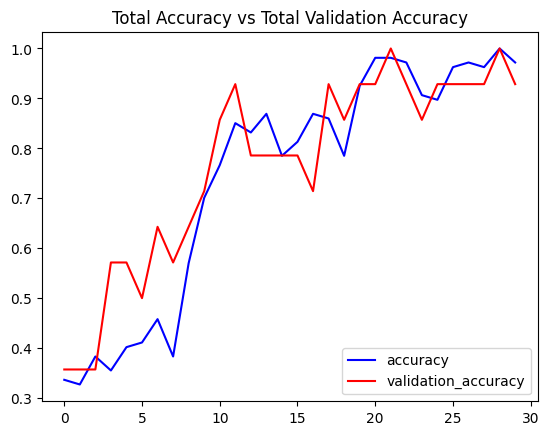

In [ ]:
# Visualizing the training and validation accuracy
plt.plot(history.history['accuracy'], 'blue', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'red', label = 'validation_accuracy')
plt.title("Total Accuracy vs Total Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

1/1 [==============================] - 3s 3s/step - loss: 0.0958 - accuracy: 1.0000
Test Accuracy: 1.0
